<a href="https://colab.research.google.com/github/gayatripatil3/Capstone_Implementation/blob/main/C_CollaberativeFiltering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import TruncatedSVD

import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)

In [ ]:
from google.colab import files
files.upload()


Saving google_books_1299.csv to google_books_1299 (1).csv


{'google_books_1299 (1).csv': b'Book_id,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date\r\n0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,"NO SAFE PLACE LEFT At great cost to the Garrison and the Survey Corps, Commander Erwin has managed to recover Eren from the Titans who tried to carry him off. But during the battle, Eren manifested yet another power he doesn\'t understand. As Eren and Krista find new enemies, the Survey Corps faces threats from both inside and outside the walls. And what will happen to Ymir, now that she has decided to make herself the Titans\' prize?",Kodansha Comics,192,none,9.78E+12,English,"Jul 31, 2014"\r\n1,Antiques Roadkill: A Trash \'n\' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,"Determined to make a new start in her quaint hometown on the banks of the Mississippi, Brandy Borne never dreams she\'ll become the prime suspect in a murder case. . . \n\nMoving back in with her e

In [ ]:
df = pd.read_csv('google_books_1299.csv',error_bad_lines=False)


<ipython-input-61-d5826cbc3fb3>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('google_books_1299.csv',error_bad_lines=False)


In [ ]:
df

,Book_id,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192.0,none,9.78E+12,English,"Jul 31, 2014"
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288.0,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9.78E+12,English,"Jul 1, 2007"
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368.0,"Games &amp, Activities , Video &amp, Electronic",9.78E+12,English,"Nov 5, 2019"
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320.0,none,9.78E+12,English,"Mar 1, 2009"
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544.0,"Fiction , Fantasy , Dark Fantasy",9.78E+12,English,"Jan 8, 2009"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1294,Twas The Nightshift Before Christmas: Festive ...,Adam Kay,4.7,47,41.82,SAR,A short gift book of festive hospital diaries ...,Pan Macmillan,112.0,"Medical , Health Care Delivery",9.78E+12,English,"Oct 17, 2019"
1295,1295,Why We Sleep: The New Science of Sleep and Dreams,Matthew Walker,4.8,52,46.85,SAR,'Astonishing ... an amazing book ... absolutel...,Penguin UK,368.0,"Psychology , Cognitive Psychology &amp, Cognition",9.78E+12,English,"Sep 28, 2017"
1296,1296,How to Understand Business Finance: Edition 2,Bob Cinnamon,3.5,4,46.85,SAR,The modern marketplace is increasingly unpredi...,Kogan Page Publishers,176.0,none,9.78E+12,English,"Apr 3, 2010"
1297,1297,Spider-Man: Kraven's Last Hunt,J. M. DeMatteis,4.6,74,43.28,SAR,"Collects Web of Spider-Man #31-32, Amazing Spi...",Marvel Entertainment,168.0,none,9.78E+12,English,"Dec 10, 2014"


In [ ]:
df

,Book_id,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192.0,none,9.78E+12,English,"Jul 31, 2014"
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288.0,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9.78E+12,English,"Jul 1, 2007"
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368.0,"Games &amp, Activities , Video &amp, Electronic",9.78E+12,English,"Nov 5, 2019"
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320.0,none,9.78E+12,English,"Mar 1, 2009"
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544.0,"Fiction , Fantasy , Dark Fantasy",9.78E+12,English,"Jan 8, 2009"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1294,Twas The Nightshift Before Christmas: Festive ...,Adam Kay,4.7,47,41.82,SAR,A short gift book of festive hospital diaries ...,Pan Macmillan,112.0,"Medical , Health Care Delivery",9.78E+12,English,"Oct 17, 2019"
1295,1295,Why We Sleep: The New Science of Sleep and Dreams,Matthew Walker,4.8,52,46.85,SAR,'Astonishing ... an amazing book ... absolutel...,Penguin UK,368.0,"Psychology , Cognitive Psychology &amp, Cognition",9.78E+12,English,"Sep 28, 2017"
1296,1296,How to Understand Business Finance: Edition 2,Bob Cinnamon,3.5,4,46.85,SAR,The modern marketplace is increasingly unpredi...,Kogan Page Publishers,176.0,none,9.78E+12,English,"Apr 3, 2010"
1297,1297,Spider-Man: Kraven's Last Hunt,J. M. DeMatteis,4.6,74,43.28,SAR,"Collects Web of Spider-Man #31-32, Amazing Spi...",Marvel Entertainment,168.0,none,9.78E+12,English,"Dec 10, 2014"


In [ ]:
df.shape

(1299, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Book_id         1299 non-null   int64  
 1   title           1299 non-null   object 
 2   author          1299 non-null   object 
 3   rating          1224 non-null   float64
 4   voters          1224 non-null   object 
 5   price           1299 non-null   float64
 6   currency        1299 non-null   object 
 7   description     1296 non-null   object 
 8   publisher       1299 non-null   object 
 9   page_count      1299 non-null   float64
 10  generes         1299 non-null   object 
 11  ISBN            1299 non-null   object 
 12  language        1299 non-null   object 
 13  published_date  1299 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 142.2+ KB


In [ ]:
df.isnull().sum()

Book_id            0
title              0
author             0
rating            75
voters            75
price              0
currency           0
description        3
publisher          0
page_count         0
generes            0
ISBN               0
language           0
published_date     0
dtype: int64

In [ ]:
df.dtypes

Book_id             int64
title              object
author             object
rating            float64
voters             object
price             float64
currency           object
description        object
publisher          object
page_count        float64
generes            object
ISBN               object
language           object
published_date     object
dtype: object

In [ ]:
df.columns

Index(['Book_id', 'title', 'author', 'rating', 'voters', 'price', 'currency',
       'description', 'publisher', 'page_count', 'generes', 'ISBN', 'language',
       'published_date'],
      dtype='object')

In [ ]:
df.language.unique()

array(['English'], dtype=object)

In [ ]:
df.publisher.value_counts()

HarperCollins UK             112
Hachette UK                  112
Penguin                       75
Simon and Schuster            71
DC                            52
                            ... 
Hay House, Inc                 4
Courier Corporation            4
Kodansha America LLC           4
Archie Comic Publications      3
One Acre Press                 3
Name: publisher, Length: 82, dtype: int64

In [ ]:
df.generes.value_counts()

none                                                        527
Fiction , Thrillers , Suspense                               35
Fiction , Fantasy , Epic                                     33
Comics &amp, Graphic Novels , Superheroes                    30
Fiction , Mystery &amp, Detective , General                  21
                                                           ... 
Biography &amp, Autobiography , Science &amp, Technology      1
Political Science , Public Affairs &amp, Administration       1
Cooking , Holiday                                             1
Social Science , Popular Culture                              1
Medical , Health Care Delivery                                1
Name: generes, Length: 242, dtype: int64

**Data Preprocessing**

In [ ]:
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

In [ ]:
df

,Book_id,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192.0,none,9.78E+12,English,2014-07-31
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288.0,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9.78E+12,English,2007-07-01
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368.0,"Games &amp, Activities , Video &amp, Electronic",9.78E+12,English,2019-11-05
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320.0,none,9.78E+12,English,2009-03-01
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544.0,"Fiction , Fantasy , Dark Fantasy",9.78E+12,English,2009-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1294,Twas The Nightshift Before Christmas: Festive ...,Adam Kay,4.7,47,41.82,SAR,A short gift book of festive hospital diaries ...,Pan Macmillan,112.0,"Medical , Health Care Delivery",9.78E+12,English,2019-10-17
1295,1295,Why We Sleep: The New Science of Sleep and Dreams,Matthew Walker,4.8,52,46.85,SAR,'Astonishing ... an amazing book ... absolutel...,Penguin UK,368.0,"Psychology , Cognitive Psychology &amp, Cognition",9.78E+12,English,2017-09-28
1296,1296,How to Understand Business Finance: Edition 2,Bob Cinnamon,3.5,4,46.85,SAR,The modern marketplace is increasingly unpredi...,Kogan Page Publishers,176.0,none,9.78E+12,English,2010-04-03
1297,1297,Spider-Man: Kraven's Last Hunt,J. M. DeMatteis,4.6,74,43.28,SAR,"Collects Web of Spider-Man #31-32, Amazing Spi...",Marvel Entertainment,168.0,none,9.78E+12,English,2014-12-10


In [ ]:
df['Year'] = pd.to_datetime(df['published_date']).dt.to_period('Y')

In [ ]:

df

,Book_id,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date,Year
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192.0,none,9.78E+12,English,2014-07-31,2014
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288.0,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9.78E+12,English,2007-07-01,2007
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368.0,"Games &amp, Activities , Video &amp, Electronic",9.78E+12,English,2019-11-05,2019
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320.0,none,9.78E+12,English,2009-03-01,2009
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544.0,"Fiction , Fantasy , Dark Fantasy",9.78E+12,English,2009-01-08,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1294,Twas The Nightshift Before Christmas: Festive ...,Adam Kay,4.7,47,41.82,SAR,A short gift book of festive hospital diaries ...,Pan Macmillan,112.0,"Medical , Health Care Delivery",9.78E+12,English,2019-10-17,2019
1295,1295,Why We Sleep: The New Science of Sleep and Dreams,Matthew Walker,4.8,52,46.85,SAR,'Astonishing ... an amazing book ... absolutel...,Penguin UK,368.0,"Psychology , Cognitive Psychology &amp, Cognition",9.78E+12,English,2017-09-28,2017
1296,1296,How to Understand Business Finance: Edition 2,Bob Cinnamon,3.5,4,46.85,SAR,The modern marketplace is increasingly unpredi...,Kogan Page Publishers,176.0,none,9.78E+12,English,2010-04-03,2010
1297,1297,Spider-Man: Kraven's Last Hunt,J. M. DeMatteis,4.6,74,43.28,SAR,"Collects Web of Spider-Man #31-32, Amazing Spi...",Marvel Entertainment,168.0,none,9.78E+12,English,2014-12-10,2014


**Removing Duplicates From Data**

In [ ]:
df2 = df.copy()
df2

,Book_id,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date,Year
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192.0,none,9.78E+12,English,2014-07-31,2014
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288.0,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9.78E+12,English,2007-07-01,2007
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368.0,"Games &amp, Activities , Video &amp, Electronic",9.78E+12,English,2019-11-05,2019
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320.0,none,9.78E+12,English,2009-03-01,2009
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544.0,"Fiction , Fantasy , Dark Fantasy",9.78E+12,English,2009-01-08,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1294,Twas The Nightshift Before Christmas: Festive ...,Adam Kay,4.7,47,41.82,SAR,A short gift book of festive hospital diaries ...,Pan Macmillan,112.0,"Medical , Health Care Delivery",9.78E+12,English,2019-10-17,2019
1295,1295,Why We Sleep: The New Science of Sleep and Dreams,Matthew Walker,4.8,52,46.85,SAR,'Astonishing ... an amazing book ... absolutel...,Penguin UK,368.0,"Psychology , Cognitive Psychology &amp, Cognition",9.78E+12,English,2017-09-28,2017
1296,1296,How to Understand Business Finance: Edition 2,Bob Cinnamon,3.5,4,46.85,SAR,The modern marketplace is increasingly unpredi...,Kogan Page Publishers,176.0,none,9.78E+12,English,2010-04-03,2010
1297,1297,Spider-Man: Kraven's Last Hunt,J. M. DeMatteis,4.6,74,43.28,SAR,"Collects Web of Spider-Man #31-32, Amazing Spi...",Marvel Entertainment,168.0,none,9.78E+12,English,2014-12-10,2014


In [ ]:
df2 = df.drop_duplicates(keep=False)
df2

,Book_id,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date,Year
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192.0,none,9.78E+12,English,2014-07-31,2014
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288.0,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9.78E+12,English,2007-07-01,2007
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368.0,"Games &amp, Activities , Video &amp, Electronic",9.78E+12,English,2019-11-05,2019
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320.0,none,9.78E+12,English,2009-03-01,2009
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544.0,"Fiction , Fantasy , Dark Fantasy",9.78E+12,English,2009-01-08,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1294,Twas The Nightshift Before Christmas: Festive ...,Adam Kay,4.7,47,41.82,SAR,A short gift book of festive hospital diaries ...,Pan Macmillan,112.0,"Medical , Health Care Delivery",9.78E+12,English,2019-10-17,2019
1295,1295,Why We Sleep: The New Science of Sleep and Dreams,Matthew Walker,4.8,52,46.85,SAR,'Astonishing ... an amazing book ... absolutel...,Penguin UK,368.0,"Psychology , Cognitive Psychology &amp, Cognition",9.78E+12,English,2017-09-28,2017
1296,1296,How to Understand Business Finance: Edition 2,Bob Cinnamon,3.5,4,46.85,SAR,The modern marketplace is increasingly unpredi...,Kogan Page Publishers,176.0,none,9.78E+12,English,2010-04-03,2010
1297,1297,Spider-Man: Kraven's Last Hunt,J. M. DeMatteis,4.6,74,43.28,SAR,"Collects Web of Spider-Man #31-32, Amazing Spi...",Marvel Entertainment,168.0,none,9.78E+12,English,2014-12-10,2014


In [ ]:
df2 = df2.drop_duplicates(['title'], keep='first')

**Missing value handling**

In [ ]:
df2.isnull().sum()

Book_id            0
title              0
author             0
rating            14
voters            14
price              0
currency           0
description        3
publisher          0
page_count         0
generes            0
ISBN               0
language           0
published_date     1
Year               1
dtype: int64

In [ ]:
df2['description'] = df2['description'].fillna('')
df2['voters'] = df2['voters'].replace(',','', regex=True)
df2['voters'] = df2['voters'].fillna(0)
df2['rating'] = df2['rating'].fillna(0)
df2['voters'] = df2['voters'].astype(int)

<ipython-input-22-26db4519c7f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['description'] = df2['description'].fillna('')
<ipython-input-22-26db4519c7f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['voters'] = df2['voters'].replace(',','', regex=True)
<ipython-input-22-26db4519c7f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [ ]:
df2.isnull().sum()

Book_id           0
title             0
author            0
rating            0
voters            0
price             0
currency          0
description       0
publisher         0
page_count        0
generes           0
ISBN              0
language          0
published_date    1
Year              1
dtype: int64

In [ ]:
df2.describe()

,Book_id,rating,voters,price,page_count
count,246.000000,246.000000,246.000000,246.000000,2.460000e+02
mean,224.703252,4.177236,847.882114,46.377724,3.975610e+10
std,197.759876,1.087916,3591.803226,63.007404,6.235500e+11
min,0.000000,0.000000,0.000000,0.000000,7.000000e+00
25%,72.750000,4.100000,10.000000,19.650000,1.600000e+02
50%,169.500000,4.500000,76.000000,39.265000,2.880000e+02
75%,320.250000,4.700000,397.000000,59.030000,4.000000e+02
max,1124.000000,5.000000,38526.000000,886.080000,9.780000e+12


In [ ]:
avg_rating = round(df2['rating'].mean(),1)
avg_num = round(df2['page_count'].mean(),)

print(f"The average ratings of the book are {avg_rating}.\nThe average number of pages are {avg_num}. ")


The average ratings of the book are 4.2.
The average number of pages are 39756097910. 


In [ ]:
authors = df2['author'].value_counts().head(10)
authors

Brian Tracy        6
Ian Flynn          6
Blake Pierce       6
Morgan Rice        5
Robert Jordan      5
Agatha Christie    4
Disha Experts      4
Barbara Allan      4
Geoff Johns        4
Robert Kirkman     3
Name: author, dtype: int64

In [ ]:
books = df2.sort_values('rating', ascending = False).head(10).set_index('title')

In [ ]:
books

,Book_id,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date,Year
title,,,,,,,,,,,,,,
(FREE SAMPLE) Super 10 Sample Papers for CBSE Class 10 English Language Literature 2nd Edition,1124,Disha Experts,5.0,1,0.00,Free,,Disha Publications,33.0,none,Original pages,English,2019-10-21,2019
15 Delicious Slow Cooker Recipes,184,Sallie Stone,5.0,3,0.00,Free,This cookbook contains 15 delicious slow cooke...,BookRix,18.0,none,9.78E+12,English,2019-10-28,2019
The Queen of Nothing (The Folk of the Air #3),381,Holly Black,5.0,11,36.86,SAR,The intoxicating and bloodthirsty finale to th...,Bonnier Zaffre Ltd.,448.0,"Fiction , Fantasy , Dark Fantasy",9.78E+12,English,2019-11-19,2019
Tall Tales and Wee Stories: The Best of Billy Connolly,30,Billy Connolly,5.0,4,98.42,SAR,THE SUNDAY TIMES BESTSELLER'Coming from Glasgo...,Hachette UK,336.0,none,9.78E+12,English,2019-10-17,2019
Indistractable: How to Control Your Attention and Choose Your Life,260,Nir Eyal,5.0,2,69.24,SAR,'A must-read' MARK MANSON\n\n'Exactly what mos...,Bloomsbury Publishing,400.0,none,9.78E+12,English,2019-10-17,2019
Critical Role Vox Machina: Origins: Volume 1,27,Matthew Mercer,5.0,15,66.90,SAR,"From the creators of the hit show ""Critical Ro...",Dark Horse Comics,168.0,none,9.78E+12,English,2019-10-15,2019
No One Is Too Small to Make a Difference,431,Greta Thunberg,5.0,2,38.18,SAR,"The groundbreaking speeches of Greta Thunberg,...",Penguin,112.0,"Nature , Environmental Conservation &amp, Prot...",9.78E+12,English,2019-11-12,2019
Summary: The Compound Effect,249,Nine99 Innovation Lab,5.0,1,3.94,SAR,Must-read summary of Darren Hardy’s book: “The...,Nine99 Innovation Lab (OPC) Pvt Ltd,7.0,"Business & Economics , Mentoring & Coaching","Flowing text, Google-generated PDF",English,2019-07-07,2019
Home Work: A Memoir of My Hollywood Years,240,Julie Andrews,5.0,1,98.42,SAR,In this follow-up to her critically acclaimed ...,Hachette UK,352.0,none,9.78E+12,English,2019-10-15,2019


In [ ]:
rating = df2
rating

,Book_id,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date,Year
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192.0,none,9.78E+12,English,2014-07-31,2014
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288.0,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9.78E+12,English,2007-07-01,2007
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368.0,"Games &amp, Activities , Video &amp, Electronic",9.78E+12,English,2019-11-05,2019
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320.0,none,9.78E+12,English,2009-03-01,2009
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544.0,"Fiction , Fantasy , Dark Fantasy",9.78E+12,English,2009-01-08,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,746,The Complete Art of War,Sun Tzu,4.7,110,7.84,SAR,Collected here in this 4-in-1 omnibus are the ...,Simon and Schuster,667.0,"Political Science , Political Ideologies , Gen...",9.78E+12,English,2013-04-29,2013
790,790,(FREE SAMPLE) CTET English & Hindi Language 9 ...,Disha Experts,4.5,4,0.00,Free,,Disha Publications,23.0,none,Original pages,English,2019-11-06,2019
847,847,We,Yevgeny Zamyatin,4.3,49,7.13,SAR,Yevgeny Zamyatin's We is set in an urban glass...,Pan,226.0,"Fiction , Science Fiction , Action &amp, Adven...",9.78E+12,English,2013-01-15,2013
912,912,1 Sample Paper for CBSE Class 10 Science 2020 ...,Disha Experts,4.7,7,0.00,Free,,Disha Publications,25.0,none,Original pages,English,2019-10-21,2019


In [ ]:
books_rated = rating[['rating','title']].groupby('title').mean().sort_values('rating', axis=0, ascending = False).head(10)
books_rated

,rating
title,
The Red Signal: An Agatha Christie Short Story,5.0
My Little Pony: Friendship is Magic #83,5.0
Battle Sight Zero,5.0
Critical Role Vox Machina: Origins: Volume 1,5.0
Competitive Advantage: Creating and Sustaining Superior Performance,5.0
That Time I got Reincarnated as a Slime 11,5.0
Home Work: A Memoir of My Hollywood Years,5.0
Moby Dick. Illustrated edition,5.0
Summary: The Compound Effect,5.0


In [ ]:
auth_rated = df2.groupby('author')['rating'].mean().sort_values(ascending=False).head(20)
auth_rated

author
Nir Eyal             5.00
Matthew Mercer       5.00
Michael E. Porter    5.00
Gerald Seymour       5.00
Holly Black          5.00
Story by FUSE        5.00
Melville Herman      5.00
Michael Sincere      5.00
Greta Thunberg       5.00
Sallie Stone         5.00
Billy Connolly       5.00
Julie Andrews        5.00
Clive Cussler        4.95
Shannon Messenger    4.90
H. P. Lovecraft      4.90
Brent Weeks          4.80
Gerard Way           4.80
Jana DeLeon          4.80
Caleb Goellner       4.80
Pierce Brown         4.80
Name: rating, dtype: float64

In [ ]:
publisher = df2['publisher'].value_counts().head(10)
publisher

Hachette UK             20
Marvel Entertainment    16
Penguin                 15
Simon and Schuster      15
HarperCollins UK        14
DC                      13
IDW Publishing           8
Harper Collins           7
Blake Pierce             6
Del Rey                  6
Name: publisher, dtype: int64

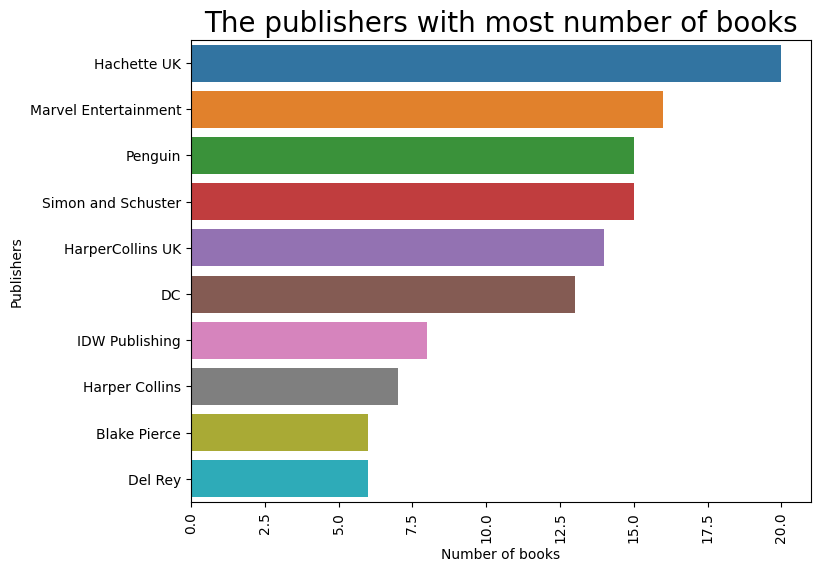

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=publisher,y=publisher.index)
plt.xticks(rotation=90)
plt.ylabel('Publishers')
plt.xlabel('Number of books')
plt.title('The publishers with most number of books', fontsize = 20)
plt.show()

In [ ]:
pages = rating[['page_count','title']].groupby('title').mean().sort_values('page_count', axis=0, ascending = False).head(10)
pages

,page_count
title,
Deadpool Team-Up Vol. 1: Good Buddies,9.780000e+12
"A Game of Thrones: The Story Continues Books 1-5: A Game of Thrones, A Clash of Kings, A Storm of Swords, A Feast for Crows, A Dance with Dragons (A Song of Ice and Fire)",4.544000e+03
"Tintinalli's Emergency Medicine: A Comprehensive Study Guide, 9th edition: Edition 9",2.192000e+03
"Chronicle of the Unhewn Throne: (The Emperor's Blades, The Providence of Fire, The Last Mortal Bond)",1.728000e+03
"Mistborn Trilogy: The Final Empire, The Well of Ascension, The Hero of Ages",1.712000e+03
"The Complete Works of William Shakespeare: All 213 Plays, Poems, Sonnets, Apocryphal Plays + The Biography: The Life of William Shakespeare by Sidney Lee: Hamlet - Romeo and Juliet - King Lear - A Midsummer Night’s Dream - Macbeth - The Tempest - Othello and many more",1.424000e+03
War and Peace: With bonus material from Give War and Peace A Chance by Andrew D. Kaufman,1.400000e+03
"The Lord of the Rings: The Fellowship of the Ring, The Two Towers, The Return of the King",1.216000e+03
It,1.168000e+03


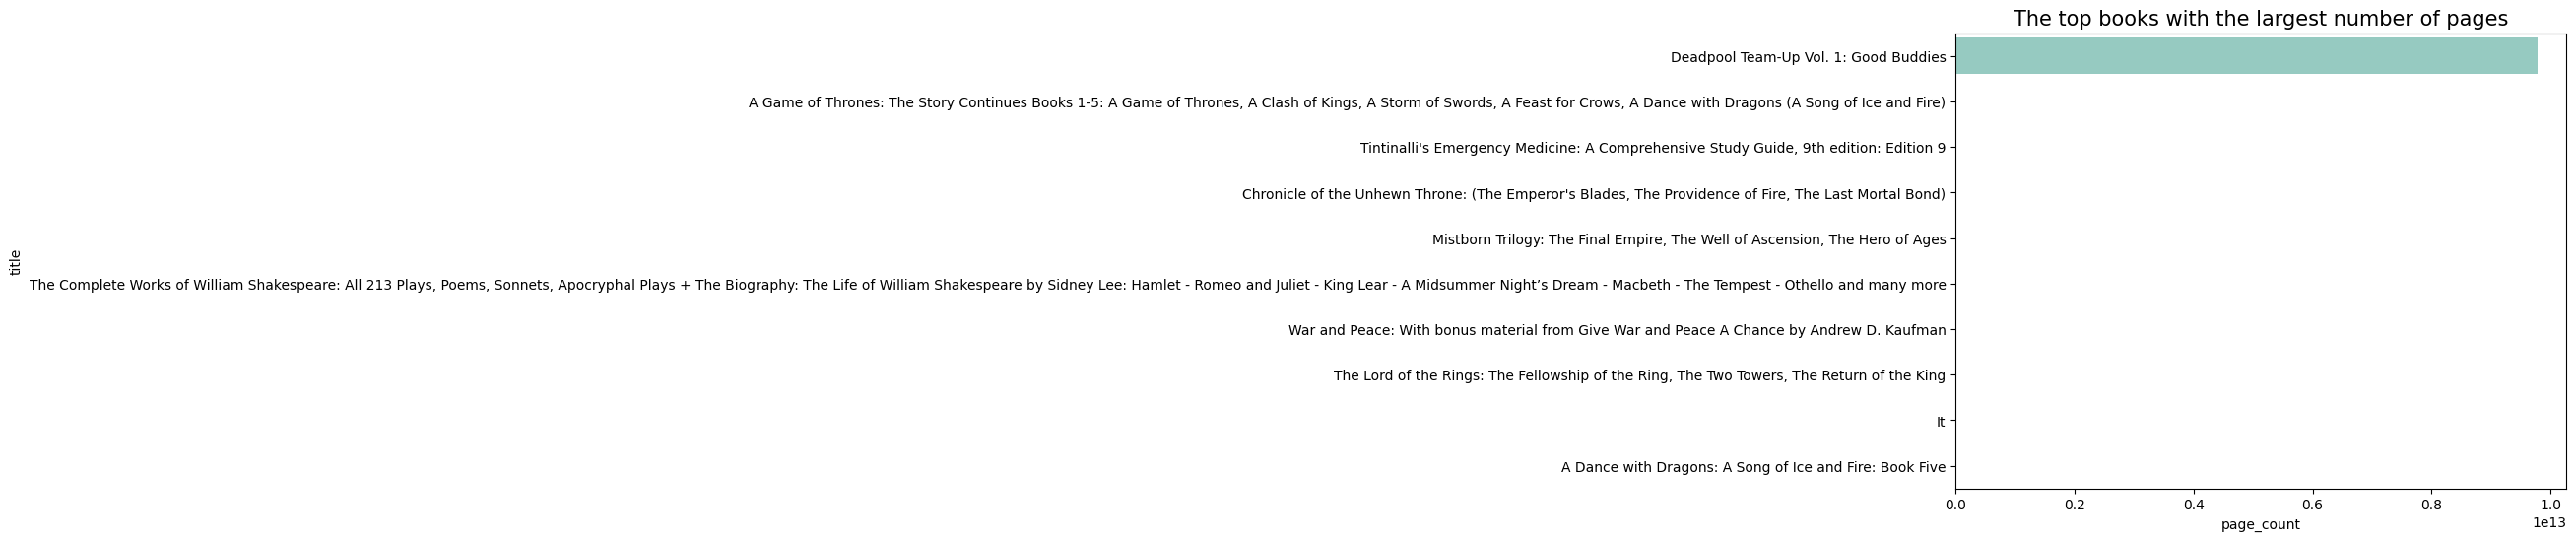

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=pages['page_count'], y=pages.index, palette='Set3')
plt.title('The top books with the largest number of pages', fontsize = 15)
plt.show()

In [ ]:
pub_year = df2.Year.value_counts().head(10)
pub_year

2019    53
2014    26
2015    22
2011    21
2016    21
2010    17
2012    15
2013    14
2018    13
2017    12
Freq: A-DEC, Name: Year, dtype: int64

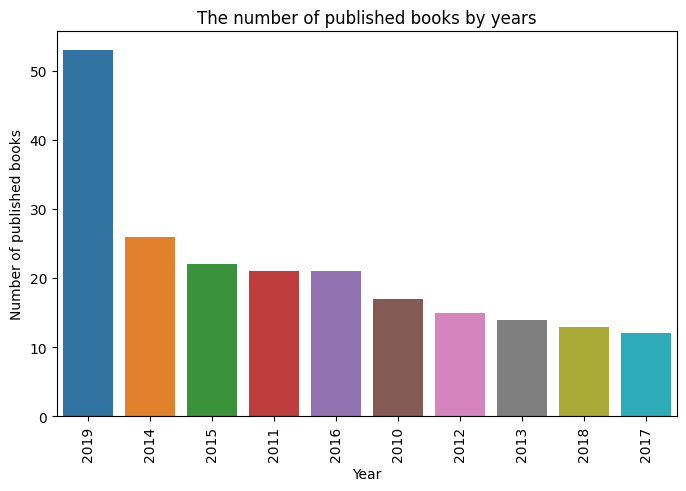

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=pub_year.index,y=pub_year)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of published books')
plt.title('The number of published books by years')
plt.show()

<ipython-input-38-3c824c38c102>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.rating, color = 'teal')


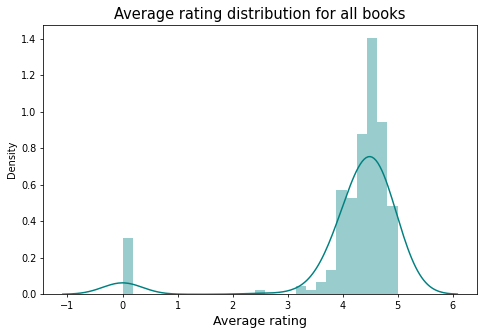

In [ ]:
plt.figure(figsize=(8,5), dpi = 70)
sns.distplot(df2.rating, color = 'teal')
plt.xlabel('Average rating', fontsize=13)
plt.title('Average rating distribution for all books',fontsize=15)
plt.show();

In [ ]:
def create_rating(row):
    """The function to create a column rating between"""
    if row >= 0 and row <=1:
        return '0-1'
    if row >= 1 and row <=2:
        return '1-2'
    if row >= 2 and row <=3:
        return '2-3'
    if row >= 3 and row <=4:
        return '3-4'
    if row >= 4 and row <=5:
        return '4-5'

In [ ]:
df2['rating_between'] = df2['rating'].apply(create_rating)

<ipython-input-40-70f7fb758bb8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['rating_between'] = df2['rating'].apply(create_rating)


In [ ]:
df2.head(20)

,Book_id,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date,Year,rating_between
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192.0,none,9.78E+12,English,2014-07-31,2014,4-5
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288.0,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9.78E+12,English,2007-07-01,2007,3-4
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368.0,"Games &amp, Activities , Video &amp, Electronic",9.78E+12,English,2019-11-05,2019,3-4
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320.0,none,9.78E+12,English,2009-03-01,2009,3-4
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544.0,"Fiction , Fantasy , Dark Fantasy",9.78E+12,English,2009-01-08,2009,4-5
5,5,"A Feast for Crows (A Song of Ice and Fire, Boo...",George R.R. Martin,4.5,832,29.29,SAR,HBO’s hit series A GAME OF THRONES is based on...,HarperCollins UK,864.0,none,9.78E+12,English,2011-02-24,2011,4-5
6,6,God of War: The Official Novelization,J.M. Barlog,4.5,94,15.82,SAR,The novelization of the highly anticipated God...,Titan Books,400.0,"Fiction , Media Tie-In",9.78E+12,English,2018-08-28,2018,4-5
7,7,Edgedancer: From the Stormlight Archive,Brandon Sanderson,4.8,221,36.79,SAR,From #1 New York Times bestselling author Bran...,Tor Books,226.0,"Fiction , Fantasy , Epic",9.78E+12,English,2017-10-17,2017,4-5
8,8,"Blood, Sweat, and Pixels: The Triumphant, Turb...",Jason Schreier,4.3,135,50.25,SAR,NATIONAL BESTSELLERDeveloping video games—hero...,HarperCollins,304.0,"Games &amp, Activities , Video &amp, Electronic",9.78E+12,English,2017-09-05,2017,4-5
9,9,Twas The Nightshift Before Christmas: Festive ...,Adam Kay,4.7,47,41.82,SAR,A short gift book of festive hospital diaries ...,Pan Macmillan,112.0,"Biography &amp, Autobiography , Medical (incl....",9.78E+12,English,2019-10-17,2019,4-5


In [ ]:
rating_df = pd.get_dummies(df2['rating_between'])
language_df = pd.get_dummies(df2['language'])

In [ ]:
rating_df.head()

,0-1,2-3,3-4,4-5
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1


In [ ]:
language_df.head()

,English
0,1
1,1
2,1
3,1
4,1


In [ ]:
features = pd.concat([rating_df,
                      language_df,
                      df2['rating'],
                      ], axis=1)
features.head()

,0-1,2-3,3-4,4-5,English,rating
0,0,0,0,1,1,4.6
1,0,0,1,0,1,3.3
2,0,0,1,0,1,3.9
3,0,0,1,0,1,4.0
4,0,0,0,1,1,4.5


In [ ]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [ ]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='auto')
model.fit(features)
distance, indices = model.kneighbors(features)

In [ ]:
def make_recommendations(name):
    """The function to get recommendations"""
    book_list = []
    book_id = df2[df2['title'] == name].index
    book_id = book_id[0]
    for newid in indices[book_id]:
        book_list.append(df2.loc[newid].title)
    print("Recommended books are:\n")
    for i in range(0,len(book_list)):
        print(f"{i+1}){book_list[i]}")

In [ ]:
def make_recommendations(name):
    book_list = []
    try:
        book_id = df[df['title'] == name].index[0]
    except IndexError:
        print(f"Book '{name}' not found in the DataFrame.")
        return

    for newid in indices[book_id]:
        book_list.append(df2.loc[newid].title)

    print("Recommended books are:\n")
    for i in range(0, len(book_list)):
        print(f"{i + 1}){book_list[i]}")


In [ ]:
make_recommendations("After Anna")

KeyError: ignored